In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
# %pip install h5py graphviz pydot


In [2]:
data = pd.read_csv('diabetes_prediction_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df = data.copy()
ds = data.copy()
# ds.info()

In [5]:
categorical = ds.select_dtypes(exclude = 'number')
numerical = ds.select_dtypes(include = 'number')

print(f"\t\t\t\t\tCategorical ds")
display(categorical.head(3))

print(f"\n\n\t\t\t\t\tNumerical ds")
display(numerical.head(3))

					Categorical ds


,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never




					Numerical ds


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0


In [14]:
import pickle
import pandas as pd
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Create LabelEncoder and StandardScaler instances
lbl_en = defaultdict(LabelEncoder)
scaler = StandardScaler()

columns_to_encode = ['gender', 'smoking_history']
columns_to_scale = ['age','bmi', 'blood_glucose_level']  # Add your numeric columns here

# Apply LabelEncoder to categorical columns
ds[columns_to_encode] = ds[columns_to_encode].apply(lambda x: lbl_en[x.name].fit_transform(x))

# Apply StandardScaler to numeric columns
ds[columns_to_scale] = scaler.fit_transform(ds[columns_to_scale])

# Save LabelEncoder, StandardScaler, and other necessary information
filename = 'labSca.sav'
data_to_save = {
    'label_encoders': dict(lbl_en),
    'scaler': scaler,
    'columns_to_encode': columns_to_encode,
    'columns_to_scale': columns_to_scale
    # Add any other information you want to save
}

pickle.dump(data_to_save, open(filename, 'wb'))


In [15]:
ds.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.692704,0,1,4,-0.321056,6.6,0.047704,0
1,0,0.538006,0,0,0,-0.000116,6.6,-1.426210,0
2,1,-0.616691,0,0,4,-0.000116,5.7,0.489878,0
3,0,-0.261399,0,0,1,-0.583232,5.0,0.416183,0
4,1,1.515058,1,1,1,-1.081970,4.8,0.416183,0


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

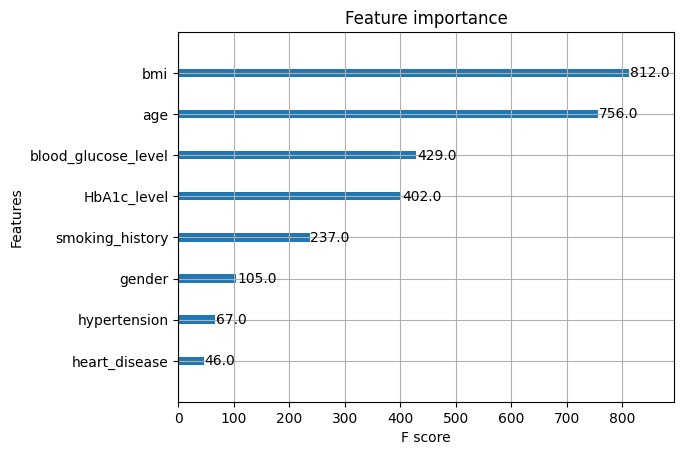

In [16]:
x = ds.drop('diabetes',axis=1)
y = df.diabetes
#using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x,y)

# first feature importance scores
xgb.plot_importance(model)

In [18]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [20]:
# feature selection
selected_columns = ['age','gender', 'bmi', 'blood_glucose_level', 'HbA1c_level', 'smoking_history', 'heart_disease']
new_ds = ds[selected_columns]
new_ds.head()

,age,gender,bmi,blood_glucose_level,HbA1c_level,smoking_history,heart_disease
0,1.692704,0,-0.321056,0.047704,6.6,4,1
1,0.538006,0,-0.000116,-1.426210,6.6,0,0
2,-0.616691,1,-0.000116,0.489878,5.7,4,0
3,-0.261399,0,-0.583232,0.416183,5.0,1,0
4,1.515058,1,-1.081970,0.416183,4.8,1,1


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


x_train, x_test, y_train, y_test = train_test_split(new_ds, y, test_size = 0.10, random_state = 47, stratify = y)
print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print('y_train: {}'.format(y_train.shape))
print('y_test: {}'.format(y_test.shape))

x_train: (90000, 7)
x_test: (10000, 7)
y_train: (90000,)
y_test: (10000,)


In [22]:
# DEEPE LEARNING MODEL

model = tf.keras.Sequential([ #........................ Instantiate the model creating class.
    tf.keras.layers.Dense(units=12, activation='relu'), #... Input layer of 12 features
    tf.keras.layers.Dense(20, activation='relu'), #.... Add the second 20 layer, and instantiate the activation to be used.
    tf.keras.layers.Dense(40, activation='relu'), #..... Add the third layer.
    tf.keras.layers.Dense(20, activation='relu'), #..... Add the third layer.
    tf.keras.layers.Dense(40, activation='relu'), #..... Add the third layer.
    tf.keras.layers.Dense(1, activation='sigmoid') #... Add the last output layer
])
model.compile(optimizer='adam', # ..................... The optimizer that adjusts weight and bias for a given neuron
              loss = 'binary_crossentropy', #...... Loss calculates the error of the prediction
              metrics=['accuracy']) #.................. Accuracy calculates the precision of the prediction.

model.fit(x_train, y_train, epochs=25) #..... Fit the model on the dataset and define the number of epochs



Epoch 1/25


2813/2813 [==============================] - 14s 3ms/step - loss: 0.1420 - accuracy: 0.9515
Epoch 2/25
2813/2813 [==============================] - 9s 3ms/step - loss: 0.1048 - accuracy: 0.9634
Epoch 3/25
2813/2813 [==============================] - 7s 3ms/step - loss: 0.1007 - accuracy: 0.9649
Epoch 4/25
2813/2813 [==============================] - 8s 3ms/step - loss: 0.0983 - accuracy: 0.9657
Epoch 5/25
2813/2813 [==============================] - 7s 3ms/step - loss: 0.0950 - accuracy: 0.9670
Epoch 6/25
2813/2813 [==============================] - 11s 4ms/step - loss: 0.0927 - accuracy: 0.9675
Epoch 7/25
2813/2813 [==============================] - 9s 3ms/step - loss: 0.0910 - accuracy: 0.9684
Epoch 8/25
2813/2813 [==============================] - 9s 3ms/step - loss: 0.0913 - accuracy: 0.9680
Epoch 9/25
2813/2813 [==============================] - 9s 3ms/step - loss: 0.0912 - accuracy: 0.9678
Epoch 10/25
2813/2813 [==============================] - 10s 3ms/step - loss

In [23]:
score = model.evaluate(x_test, y_test, verbose = 0)
print(f'Test Loss: {score[0]}\Test Accuracy: {score[1]}')

Test Loss: 0.08961613476276398\Test Accuracy: 0.9692999720573425


In [27]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  #............................................... set a 50% confidence level that the customer doesnt stop buying
outcome = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
outcome

313/313 [==============================] - 1s 4ms/step


,Actual,Predicted
83535,0,0
73372,0,0
53174,0,0
93492,0,0
35010,0,0
...,...,...
62816,0,0
22541,0,0
69980,0,0
29917,0,0


In [24]:
score = model.evaluate(x_test, y_test, verbose = 0)
print(f'Test Loss: {score[0]}\Test Accuracy: {score[1]}')

Test Loss: 0.08961613476276398\Test Accuracy: 0.9692999720573425


<Axes: xlabel='diabetes', ylabel='count'>

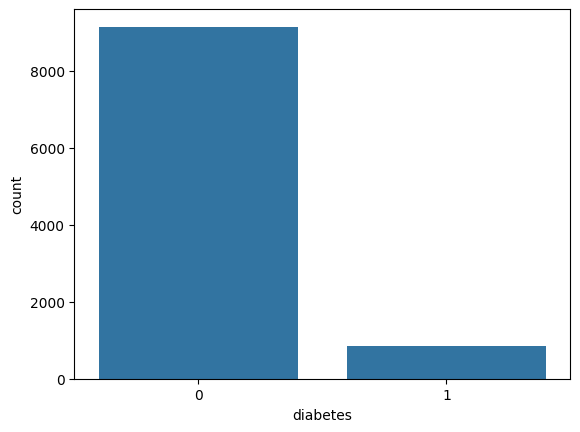

In [25]:
sns.countplot(x = y_test)


<Axes: xlabel='diabetes', ylabel='count'>

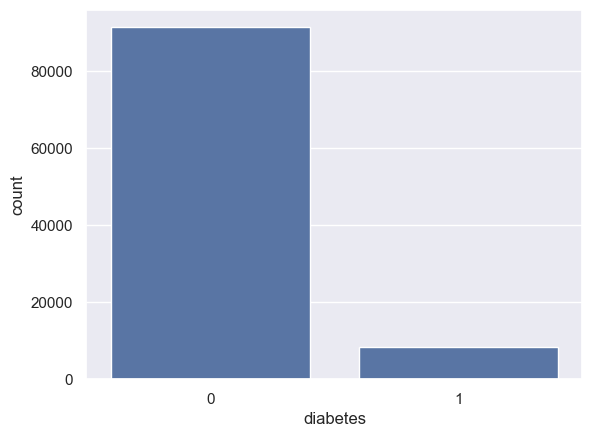

In [29]:
sns.countplot(x = ds.diabetes)


              precision    recall  f1-score   support

           0       1.00      0.97      0.98      9401
           1       0.67      0.95      0.79       599

    accuracy                           0.97     10000
   macro avg       0.83      0.96      0.89     10000
weighted avg       0.98      0.97      0.97     10000



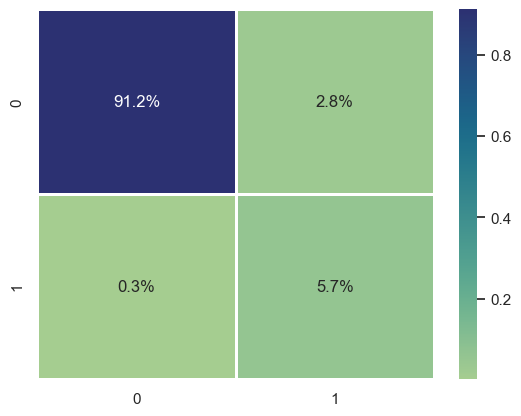

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

revealer = confusion_matrix(y_pred, y_test)
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', fmt='.1%', linewidth=1)

print(classification_report(y_pred, y_test))

In [30]:
model.save('cavistadiabetespred.h5')

c:\Users\SAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
